## Primera implementación del método de involuciones para el mapeo estandar.

In [1]:
using PyCall
using LaTeXStrings
@pyimport numpy as np
using SymPy
using Roots
using Plots

┌ Warning: `@pyimport foo` is deprecated in favor of `foo = pyimport("foo")`.
│   caller = _pywrap_pyimport(::PyObject) at PyCall.jl:399
└ @ PyCall /home/eve/.julia/packages/PyCall/zqDXB/src/PyCall.jl:399


In [ ]:
x = Sym("x")
y = Sym("y")
κ = Sym("κ")

Defino el mapeo por pedazos.

In [7]:
function EstandarX(x,y,κ)
    vx = x + y - κ*sin(2*pi*x)/2*pi
    return vx
end

EstandarX (generic function with 1 method)

In [8]:
function EstandarY(x,y,κ)
    vy =  y - κ*sin(2*pi*x )/2*pi 
    return vy
end

EstandarY (generic function with 1 method)

Evaluo una nueva función para el pimero conjunto invariante.

In [9]:
# kappa = 0.97
EstandarAX(y) = EstandarX(0.0,y,0.97)
EstandarAY(y) = EstandarY(0.0,y,0.97)

EstandarAY (generic function with 1 method)

Itero dos veces el mapeo para buscar puntos de periodo 2

In [10]:
Estandar2X(y) = EstandarAX(EstandarAX(y))
Estandar2Y(y) = EstandarAY(EstandarAY(y))

Estandar2X (generic function with 1 method)

In [15]:
find_zeros(Estandar2X,0.0,2.0*pi)
find_zeros(Estandar2Y,0.0,2.0*pi)

1-element Array{Float64,1}:
 0.0

Defino la condición de uno de los conjuntos invariantes
$$I_{1}=\{x | x =0 \}$$
$$I_{1}=\{x | x =1/2 \}$$

$$I_{1}=\{x | x =\frac{y}{2} \}$$
$$I_{1}=\{x | x =\frac{y+1}{2} \}$$

💠 Con el segundo conjunto invariante :

In [25]:
EstandarBX(y) = EstandarX(0.5,y,0.97)
EstandarBY(y) = EstandarY(0.5,y,0.97)

EstandarBY (generic function with 1 method)

In [26]:
Estandar3X(y) = EstandarBX(EstandarBX(y))
Estandar3Y(y) = EstandarBY(EstandarBY(y))

Estandar3Y (generic function with 1 method)

In [36]:
find_zeros(Estandar3X,-1.0,2.0*pi)

1-element Array{Float64,1}:
 -1.0

In [37]:
find_zeros(Estandar3Y,-1.0,2.0*pi)

1-element Array{Float64,1}:
 3.7319211458202725e-16

In [35]:
Estandar3X(y)

y + 1.0

In [6]:
Est1 = Est(x,y,κ) 
Est2 = Est(Est1[1],Est1[2],κ)

2-element Array{Sym,1}:
 x + 2*y - pi*κ*sin(6.28318530717959*x) - pi*κ*sin(6.28318530717959*x + 6.28318530717959*y - 3.14159265358979*pi*κ*sin(6.28318530717959*x))/2
     y - pi*κ*sin(6.28318530717959*x)/2 - pi*κ*sin(6.28318530717959*x + 6.28318530717959*y - 3.14159265358979*pi*κ*sin(6.28318530717959*x))/2

In [7]:
Est2C = Est2.subs([(x,0.0),(κ,0.97)])

2×1 Array{Sym,2}:
 2*y - 0.485*pi*sin(6.28318530717959*y)
   y - 0.485*pi*sin(6.28318530717959*y)

Resolvemos las dos ecuaciones anteriores

In [8]:
cero1aY = find_zeros(Est2C[1],0.0,2*pi)
cero1aY = [mod(cero1aY[i],1) for i in 1:length(cero1aY)]

cero1bY = find_zeros(Est2C[2],0.0,2*pi)
cero1bY = [mod(cero1bY[i],1) for i in 1:length(cero1bY)]


4-element Array{Float64,1}:
 0.0
 0.45205857565908486
 0.133522912021945
 0.3309233459997618

Comprobamos que los cálculos sean correctos.

In [9]:
print(Est2C[1].subs(y,cero1aY[1]))
print(Est2C[2].subs(y,cero1bY[1]))

00.0

Es decir si son las raices.



Los puntos que encontramos fueron 

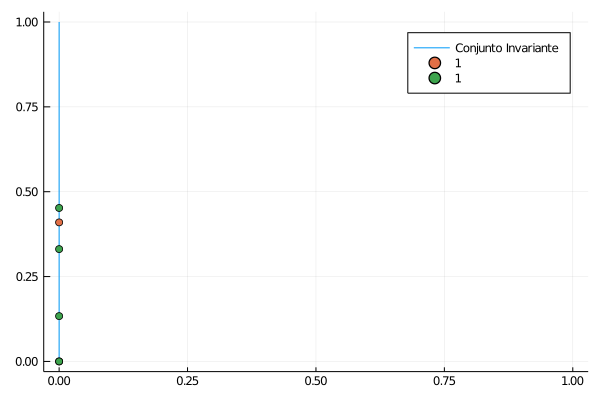

In [10]:
listaX = zeros(11)
listaY = [y for y in 0:0.1:1.0]
plot(listaX, listaY, label = "Conjunto Invariante")
scatter!([zeros(length(cero1aY)),zeros(length(cero1bY))], [cero1aY,cero1bY], label = "1")

💠 Si calculamos con el otro conjunto invariante donde 
$$I_{1}=\{x | x =1/2 \}$$


In [11]:
Est2C1 = Est2.subs([(x,1.0/2.0),(κ, 0.97)])

2×1 Array{Sym,2}:
 2*y - 0.485*pi*sin(6.28318530717959*y - 3.73192114582027e-16*pi + 3.14159265358979) - 1.18790739517293e-16*pi + 0.5
         y - 0.485*pi*sin(6.28318530717959*y - 3.73192114582027e-16*pi + 3.14159265358979) - 5.93953697586466e-17*pi

In [12]:
cero2aY = find_zeros(Est2C1[1],-1,1)
cero2aY = [mod(N(cero2aY[i]),1) for i in 1:length(cero2aY)]
cero2bY = find_zeros(Est2C1[2],-1,1)
cero2bY = [mod(N(cero2bY[i]),1) for i in 1:length(cero2bY)]


5-element Array{Float64,1}:
 0.10050454542498521
 0.4401140443141184
 1.7669748230352872e-16
 0.5598859556858821
 0.899495454575015

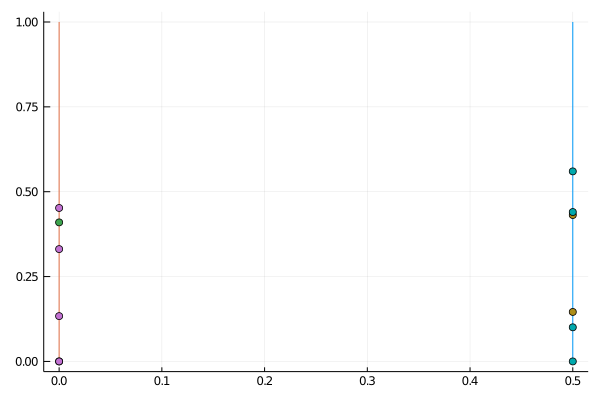

In [13]:
listaY2 = [y for y in 0.0:0.1:1.0]
listaX2 = 0.5*ones(11)
plot(listaX2, listaY2, label = "")
plot!(listaX, listaY, label = "")
scatter!([zeros(length(cero1aY)),zeros(length(cero1bY))], [cero1aY,cero1bY], label = "")
scatter!([0.5*ones(length(cero1aY)),0.5*ones(length(cero1bY))], [cero2aY,cero2bY], label = "")

💠 Con el conjunto invariante 
$$I_{2}=\{x | x =\frac{y}{2} \}$$


In [14]:
Est2C1 = Est2.subs([(x,y/2),(κ,0.97)])

2×1 Array{Sym,2}:
 5*y/2 - 0.97*pi*sin(3.14159265358979*y) - 0.485*pi*sin(9.42477796076938*y - 3.0473448739821*pi*sin(3.14159265358979*y))
    y - 0.485*pi*sin(3.14159265358979*y) - 0.485*pi*sin(9.42477796076938*y - 3.0473448739821*pi*sin(3.14159265358979*y))

In [15]:
cero3aY = find_zeros(Est2C1[1],-2*pi,2*pi)
cero3aY = [mod(N(cero3aY[i]),1) for i in 1:length(cero3aY)];
cero3bY = find_zeros(Est2C1[2],-2*pi,2*pi)
cero3bY = [mod(N(cero3bY[i]),1) for i in 1:length(cero3bY)];

In [16]:
cero3aX = [mod(0.5*cero3aY[i],1) for i in 1:length(cero3aY)];
cero3bX = [mod(0.5*cero3bY[i],1) for i in 1:length(cero3bY)];


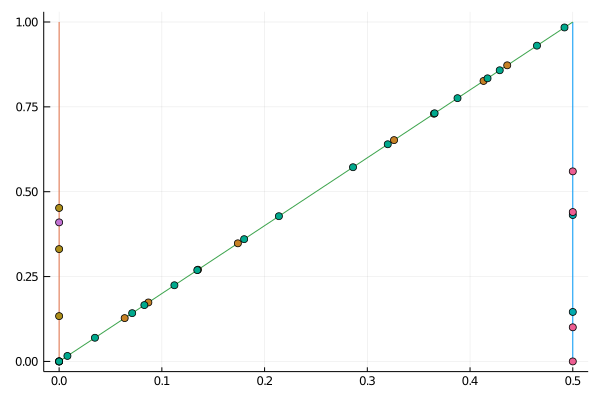

In [17]:
listaY3 = listaY2
listaX3 = [listaY3[i]/2.0 for i in 1:length(listaY3)]
plot(listaX2, listaY2, label = "")
plot!(listaX, listaY, label = "")
plot!(listaX3, listaY3, label = "")
scatter!([zeros(length(cero1aY)),zeros(length(cero1bY))], [cero1aY,cero1bY], label = "")
scatter!([0.5*ones(length(cero1aY)),0.5*ones(length(cero1bY))], [cero2aY,cero2bY], label = "")
scatter!([cero3aX,cero3bX],[cero3aY,cero3bY], label="")

💠 Con el siguiente conjunto invariante
$$I_{1}=\{x | x =\frac{y+1}{2} \}$$

In [22]:
Est2C2 = Est2.subs([(x,(y+1)/2),(κ,0.97)])

2×1 Array{Sym,2}:
 5*y/2 - 0.97*pi*sin(3.14159265358979*y + 3.14159265358979) - 0.485*pi*sin(9.42477796076938*y - 3.0473448739821*pi*sin(3.14159265358979*y + 3.14159265358979) + 3.14159265358979) + 1/2
          y - 0.485*pi*sin(3.14159265358979*y + 3.14159265358979) - 0.485*pi*sin(9.42477796076938*y - 3.0473448739821*pi*sin(3.14159265358979*y + 3.14159265358979) + 3.14159265358979)

In [23]:
cero4aY = find_zeros(Est2C2[1],-2*pi,2*pi)
cero4aY = [mod(N(cero4aY[i]),1) for i in 1:length(cero4aY)];
cero4bY = find_zeros(Est2C2[2],-2*pi,2*pi)
cero4bY = [mod(N(cero4bY[i]),1) for i in 1:length(cero4bY)];

In [24]:
cero4aX = [mod(0.5*cero4aY[i]+1.0,1) for i in 1:length(cero4aY)];
cero4bX = [mod(0.5*(cero4bY[i]+1.0),1) for i in 1:length(cero4bY)];

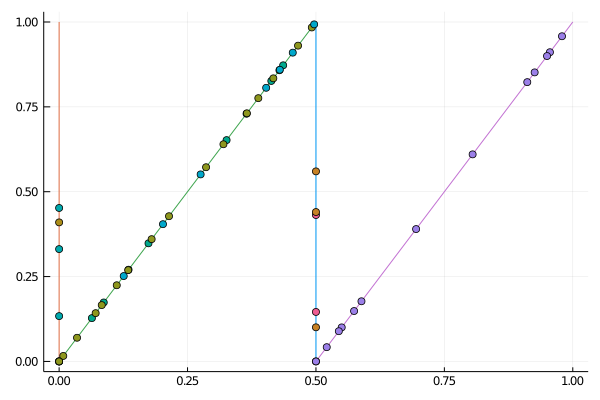

In [25]:
listaY4 = listaY2
listaX4 = [(listaY3[i]+1.0)/2.0 for i in 1:length(listaY4)]
plot(listaX2, listaY2, label = "")
plot!(listaX, listaY, label = "")
plot!(listaX3, listaY3, label = "")
plot!(listaX4, listaY4, label = "")
scatter!([zeros(length(cero1aY)),zeros(length(cero1bY))], [cero1aY,cero1bY], label = "")
scatter!([0.5*ones(length(cero1aY)),0.5*ones(length(cero1bY))], [cero2aY,cero2bY], label = "")
scatter!([cero3aX,cero3bX],[cero3aY,cero3bY], label="")
scatter!([cero4aX,cero4bX],[cero4aY,cero4bY], label="")

### ⭐ Siguiente iteración.

In [26]:
Est3 = Est(Est2[1],Est2[2],κ);

In [27]:
Est3C = Est3.subs([(x,0.0),(κ,0.97)])

2×1 Array{Sym,2}:
 3*y - 0.97*pi*sin(6.28318530717959*y) - 0.485*pi*sin(12.5663706143592*y - 3.0473448739821*pi*sin(6.28318530717959*y))
  y - 0.485*pi*sin(6.28318530717959*y) - 0.485*pi*sin(12.5663706143592*y - 3.0473448739821*pi*sin(6.28318530717959*y))

In [28]:
cero5aY = find_zeros(Est3C[1],0.0,2*pi)
cero5aY = [mod(cero5aY[i],1) for i in 1:length(cero5aY)];

cero5bY = find_zeros(Est3C[2],0.0,2*pi)
cero5bY = [mod(cero5bY[i],1) for i in 1:length(cero5bY)];

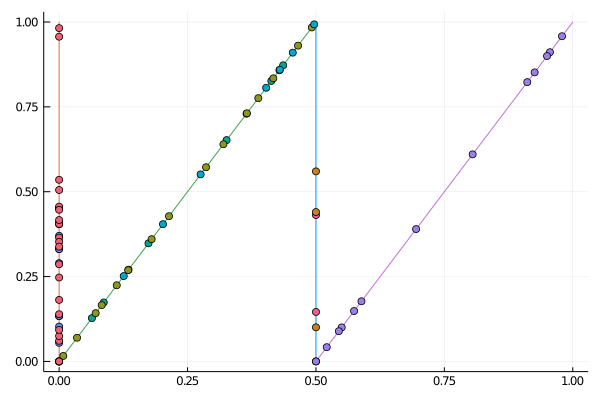

In [29]:
plot(listaX2, listaY2, label = "")
plot!(listaX, listaY, label = "")
plot!(listaX3, listaY3, label = "")
plot!(listaX4, listaY4, label = "")
scatter!([zeros(length(cero1aY)),zeros(length(cero1bY))], [cero1aY,cero1bY], label = "")
scatter!([0.5*ones(length(cero1aY)),0.5*ones(length(cero1bY))], [cero2aY,cero2bY], label = "")
scatter!([cero3aX,cero3bX],[cero3aY,cero3bY], label="")
scatter!([cero4aX,cero4bX],[cero4aY,cero4bY], label="")
scatter!([zeros(length(cero5aY)),zeros(length(cero5bY))], [cero5aY,cero5bY], label = "")

💠 Si calculamos con el otro conjunto invariante donde 
$$I_{1}=\{x | x =1/2 \}$$

In [30]:
Est3C1 = Est3.subs([(x,0.5),(κ,0.97)]);

In [31]:
cero6aY = find_zeros(Est3C1[1],0.0,2*pi)
cero6aY = [mod(cero6aY[i],1) for i in 1:length(cero6aY)];

cero6bY = find_zeros(Est3C1[2],0.0,2*pi)
cero6bY = [mod(cero6bY[i],1) for i in 1:length(cero6bY)];

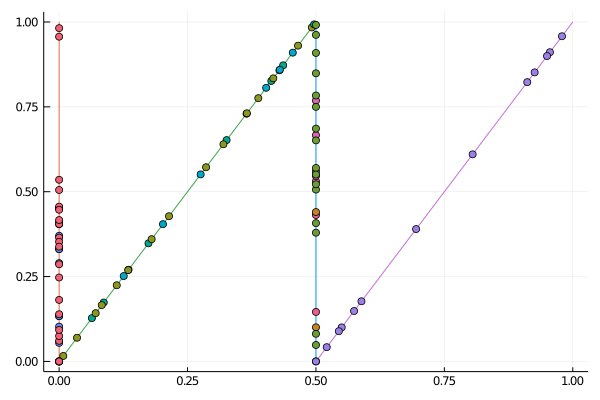

In [32]:
plot(listaX2, listaY2, label = "")
plot!(listaX, listaY, label = "")
plot!(listaX3, listaY3, label = "")
plot!(listaX4, listaY4, label = "")
scatter!([zeros(length(cero1aY)),zeros(length(cero1bY))], [cero1aY,cero1bY], label = "")
scatter!([0.5*ones(length(cero1aY)),0.5*ones(length(cero1bY))], [cero2aY,cero2bY], label = "")
scatter!([cero3aX,cero3bX],[cero3aY,cero3bY], label="")
scatter!([cero4aX,cero4bX],[cero4aY,cero4bY], label="")
scatter!([zeros(length(cero5aY)),zeros(length(cero5bY))], [cero5aY,cero5bY], label = "")
scatter!([0.5*ones(length(cero6aY)),0.5*ones(length(cero6bY))], [cero6aY,cero6bY], label = "")

💠 Con el conjunto invariante 
$$I_{2}=\{x | x =\frac{y}{2} \}$$

In [33]:
Est3C2 = Est3.subs([(x,0.5*y),(κ,0.97)]);

In [34]:
cero7aY = find_zeros(Est3C2[1],0.0,2*pi)
cero7aY = [mod(cero7aY[i],1) for i in 1:length(cero7aY)];

cero7bY = find_zeros(Est3C2[2],0.0,2*pi)
cero7bY = [mod(cero7bY[i],1) for i in 1:length(cero7bY)];

InterruptException: InterruptException:

In [35]:
cero7aX = [mod(0.5*cero7aY[i],1) for i in 1:length(cero7aY)];
cero7bX = [mod(0.5*cero7bY[i],1) for i in 1:length(cero7bY)];

UndefVarError: UndefVarError: cero7bY not defined

In [36]:
plot(listaX2, listaY2, label = "")
plot!(listaX, listaY, label = "")
plot!(listaX3, listaY3, label = "")
plot!(listaX4, listaY4, label = "")
scatter!([zeros(length(cero1aY)),zeros(length(cero1bY))], [cero1aY,cero1bY], label = "")
scatter!([0.5*ones(length(cero1aY)),0.5*ones(length(cero1bY))], [cero2aY,cero2bY], label = "")
scatter!([cero3aX,cero3bX],[cero3aY,cero3bY], label="")
scatter!([cero4aX,cero4bX],[cero4aY,cero4bY], label="")
scatter!([zeros(length(cero5aY)),zeros(length(cero5bY))], [cero5aY,cero5bY], label = "")
scatter!([0.5*ones(length(cero6aY)),0.5*ones(length(cero6bY))], [cero6aY,cero6bY], label = "")
scatter!([cero7aX,cero7bX],[cero7aY,cero7bY], label="")

UndefVarError: UndefVarError: cero7bX not defined

Que pasa con el punto rosa??

### ⭐ Siguiente iteración.

In [91]:
NT4 = NT(NT3[1],NT3[2],a,b);

In [92]:
condicion1a = x_condicion(0.1)
NT4C1 = NT4.subs([(x,condicion1a),(a,0.1),(b,0.1)]);

In [93]:
@time cero_4IaY = find_zero(NT4C1[1],[0.0,1.0])
@time cero_4IbY = find_zero(NT4C1[2],[0.0,1.0])

  0.945176 seconds (12.72 k allocations: 377.094 KiB)
  0.715609 seconds (12.72 k allocations: 377.094 KiB)


0.2907235425450857

In [94]:
cero_4IaX = x_puntoF(0.1,cero_4IaY)
cero_4IbX = x_puntoF(0.1,cero_4IbY)

0.14390815355981743

┌ Warning: Skipped marker arg +.
└ @ Plots /home/eve/.julia/packages/Plots/mXrnb/src/args.jl:814


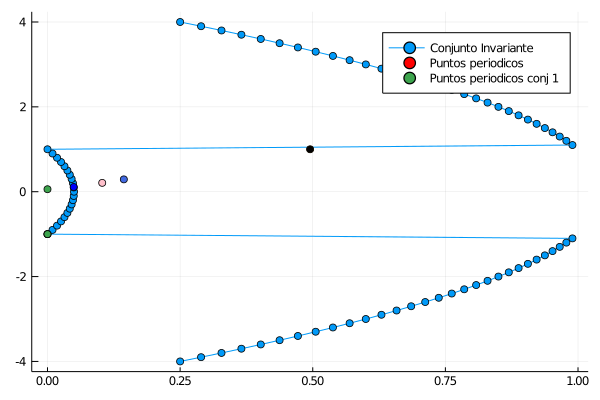

In [101]:
plot(listaX, listaY, label = "Conjunto Invariante", title = "", marker = "+")
scatter!([cero_1aX,cero_1bX,cero_3IaX,cero_3IbX, cero_4IaX, cero_4IbX],
    [cero_1aY,cero_1bY,cero_3IaY, cero_3IbY, cero_4IaY, cero_4IbY],
    color = ["red", "blue", "orange","pink", "black", "royalblue"], label = "Puntos periodicos")
scatter!([0.0,0.0],[cero_2aY,cero_2bY], label = "Puntos periodicos conj 1")